In [1]:
# import module from sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

In [2]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [3]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
# assign data and label to variables
# already in numpy ndarray so don't need to change to numpy array
df_x = diabetes.data
df_y = diabetes.target
print(df_x.shape, df_y.shape)
print(type(df_x), type(df_y))

(442, 10) (442,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=23)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(309, 10) (133, 10) (309,) (133,)


In [6]:
# looking at shape, X has 10 features/columns and W should follow the same
W = np.random.rand(10)
b = np.random.rand()

In [7]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def mse(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = mse(predictions, y)
    return L

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [8]:
# learning step
learning_rate = 0.001

losses = []

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW # W = W - learning rate * dw
    b -= learning_rate * db # b = b - learning rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 20614.3400
Iteration 200 : Loss 15583.6900
Iteration 300 : Loss 12162.6796
Iteration 400 : Loss 9823.9767
Iteration 500 : Loss 8214.0523
Iteration 600 : Loss 7095.7982
Iteration 700 : Loss 6310.0998
Iteration 800 : Loss 5750.1005
Iteration 900 : Loss 5343.9671
Iteration 1000 : Loss 5043.3451
Iteration 1100 : Loss 4815.6263
Iteration 1200 : Loss 4638.7690
Iteration 1300 : Loss 4497.8265
Iteration 1400 : Loss 4382.6214
Iteration 1500 : Loss 4286.1860
Iteration 1600 : Loss 4203.7168
Iteration 1700 : Loss 4131.8726
Iteration 1800 : Loss 4068.3034
Iteration 1900 : Loss 4011.3336
Iteration 2000 : Loss 3959.7492
Iteration 2100 : Loss 3912.6539
Iteration 2200 : Loss 3869.3718
Iteration 2300 : Loss 3829.3824
Iteration 2400 : Loss 3792.2750
Iteration 2500 : Loss 3757.7187
Iteration 2600 : Loss 3725.4411
Iteration 2700 : Loss 3695.2137
Iteration 2800 : Loss 3666.8418
Iteration 2900 : Loss 3640.1571
Iteration 3000 : Loss 3615.0124
Iteration 3100 : Loss 3591.2779
Iteration 3200

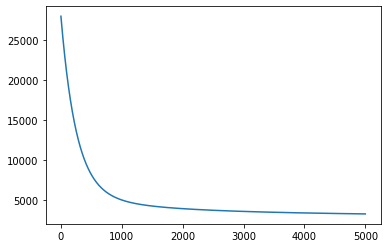

In [9]:
# visualizing iteration and loss function 
plt.plot(losses)
plt.show()

In [10]:
# testing a model with test set
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2943.8170284467715

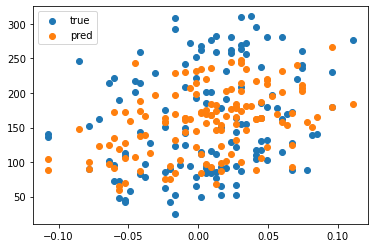

In [11]:
# visualizing with scatter plot to see the predicted values and true vlaues in a same plot
plt.scatter(X_test[:, 0], y_test, label='true')
plt.scatter(X_test[:, 0], prediction, label='pred')
plt.legend()
plt.show()